In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from string import punctuation
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [7]:
np.random.seed(1444)
df=pd.DataFrame(pd.read_csv("spam.csv",encoding='cp1257'))
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ģ_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


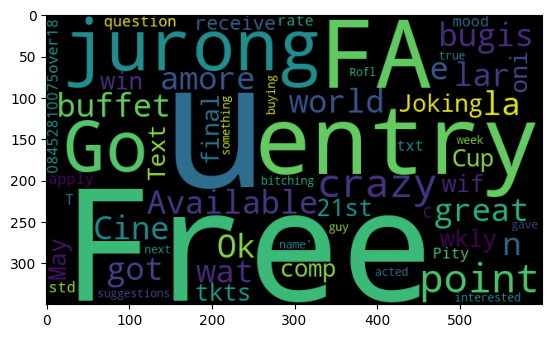

In [13]:
X=df[['v2']]
y=df['v1']
cloud=WordCloud(width=600,height=350).generate(str(X.values))
plt.imshow(cloud)
                                        

In [9]:
y.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

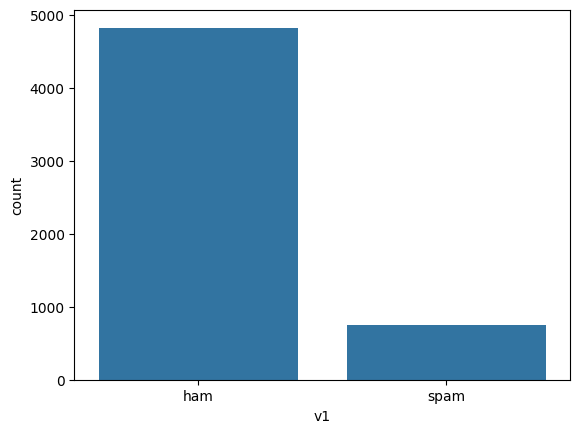

In [7]:
sns.countplot(x=y)

In [8]:
ros=RandomOverSampler(sampling_strategy='minority')
X_new,y_new=ros.fit_resample(X, y)
X_new.shape,y_new.shape

((9650, 1), (9650,))

In [9]:
lbl=LabelEncoder().fit(y_new)
y=lbl.transform(y_new)
np.unique(y)

array([0, 1])

<Axes: xlabel='v1', ylabel='count'>

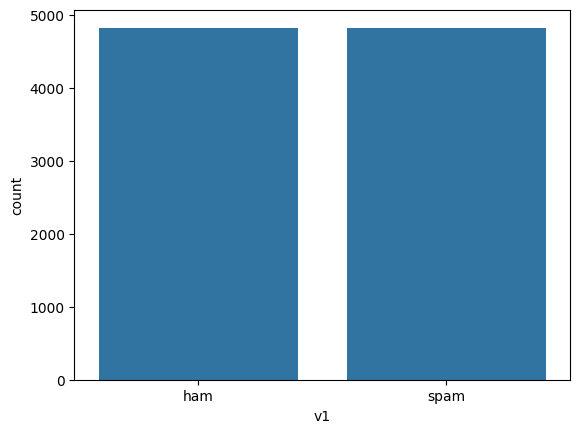

In [10]:
sns.countplot(x=y_new)

In [11]:
def preprocess(x):
    
    lemm=WordNetLemmatizer()
    stem=PorterStemmer()
    
    txt=re.sub(r"[^a-zA-Z]"," ", x)
    tok=word_tokenize(txt.lower())
    
    tok=[i for i in tok if i not in punctuation]
    
    filtered_text=[i for i in tok if i not in stopwords.words('english')]
    
    stemmed_word=[stem.stem(i) for i in filtered_text]
    
    lemmatized=[lemm.lemmatize(i) for i in stemmed_word]
    
    final_txt=" ".join(lemmatized)
    
    return final_txt

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,stratify=y,random_state=42,shuffle=True,test_size=0.2)
print(f"Feature Train shape : {X_train.shape}")
print(f"Target  Train shape : {y_train.shape}")
print(f"Feature Test shape  : {X_test.shape}")
print(f"Target  Test shape  : {y_test.shape}")

Feature Train shape : (7720, 1)
Target  Train shape : (7720,)
Feature Test shape  : (1930, 1)
Target  Test shape  : (1930,)


In [13]:
X_train=X_train['v2'].apply(preprocess)
X_test=X_test['v2'].apply(preprocess)
print("Preprocessed Data")
X_train

Preprocessed Data


8312    tone club sub expir sub repli monoc mono polyc...
1558             messag truro hospit ext phone phone side
2423                                             lmao fun
1638                      great comedi cant stop laugh da
1133    enter cabin pa said happi b day bos felt speci...
                              ...                        
7098    nd time tri contact u u pound prize claim easi...
3914                                ard lor ok messag lor
581                             ok anyway need chang said
336                            cool come havent wine dine
4482    true lov n care wil nevr go unrecogn though so...
Name: v2, Length: 7720, dtype: object

In [14]:
lbl=LabelEncoder().fit(y_new)
y=lbl.transform(y_new)
print("Classes in Target variable : ",lbl.classes_)
print("Unique Values : ",np.unique(y))

Classes in Target variable :  ['ham' 'spam']
Unique Values :  [0 1]


In [15]:
tf=TfidfVectorizer().fit(X_train)
X_train=tf.transform(X_train).toarray()
X_test=tf.transform(X_test).toarray()

In [16]:
print("Vectorized features : \n",X_train)

Vectorized features : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print("Naive Bayes Classifier : ")

clf=MultinomialNB()
model=clf.fit(X_train,y_train)
pred=model.predict(X_test)
print(model.score(X_train,y_train))
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))
print(metrics.accuracy_score(y_test,pred))

Naive Bayes Classifier : 
0.9867875647668394
[[938  27]
 [ 17 948]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       965
           1       0.97      0.98      0.98       965

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

0.9772020725388602


Text(0.5, 0, 'TPR')

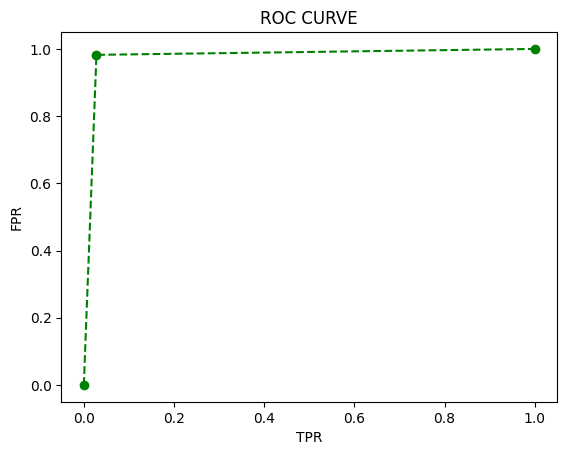

In [18]:
roc_curve=metrics.roc_curve(y_test,pred)
plt.plot(roc_curve[0],roc_curve[1],"o--g")
plt.title("ROC CURVE")
plt.ylabel("FPR")
plt.xlabel("TPR")

In [19]:
def predict_spam(txt):
    txt=preprocess(txt)
    txt=tf.transform([txt]).toarray()
    pred=model.predict(txt)
    if pred[0]==0:
        return "Not Spam"
    elif pred[0]==1:
        return "Spam"

In [20]:
predict_spam("Our records indicate that you have overpaid for (a product or service). Please provide us with your bank routing and account number to expedite your refund.")

'Spam'

In [21]:
predict_spam("Last day of submitting your form is tomorrow.Hurry up")

'Not Spam'